In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [126]:
path.name

'oxford-iiit-pet'

In [119]:
dirs = [path.name for path in path.ls()]
dirs

['annotations', 'images']

In [111]:
files = get_image_files(path/'images')
len(files)

7390

In [124]:
file_names = [file.name for file in files]
import random
random.sample(file_names, 10)

['Bengal_69.jpg',
 'scottish_terrier_127.jpg',
 'keeshond_1.jpg',
 'Sphynx_11.jpg',
 'havanese_162.jpg',
 'basset_hound_133.jpg',
 'american_pit_bull_terrier_163.jpg',
 'miniature_pinscher_170.jpg',
 'Bengal_91.jpg',
 'pomeranian_33.jpg']

In [125]:
file_names[0], file_names[6000]

('Abyssinian_1.jpg', 'scottish_terrier_1.jpg')

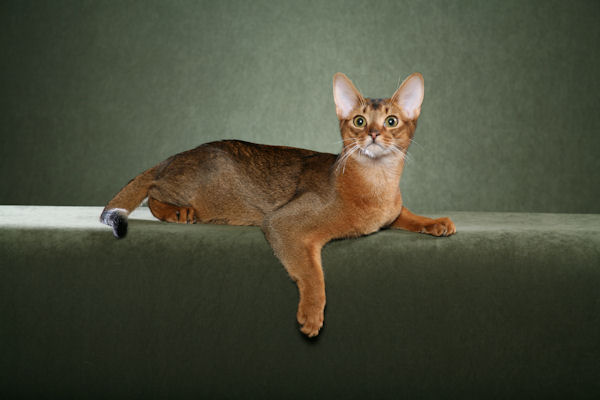

In [10]:
Image.open(files[0])

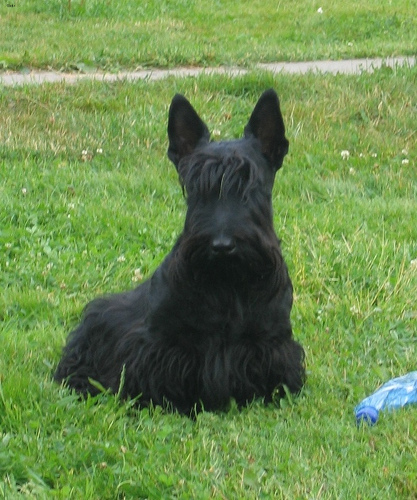

In [16]:
Image.open(files[6000])
# print(files[6000])

In [35]:
def label_func(f: str):
    return 'Cat' if f[0].isupper() else 'Dog'

In [36]:
dls = ImageDataLoaders.from_name_func(path=path, fnames=files, label_func=label_func, 
                                      validity_pct=0.2, seed=42, item_tfms=Resize(224))

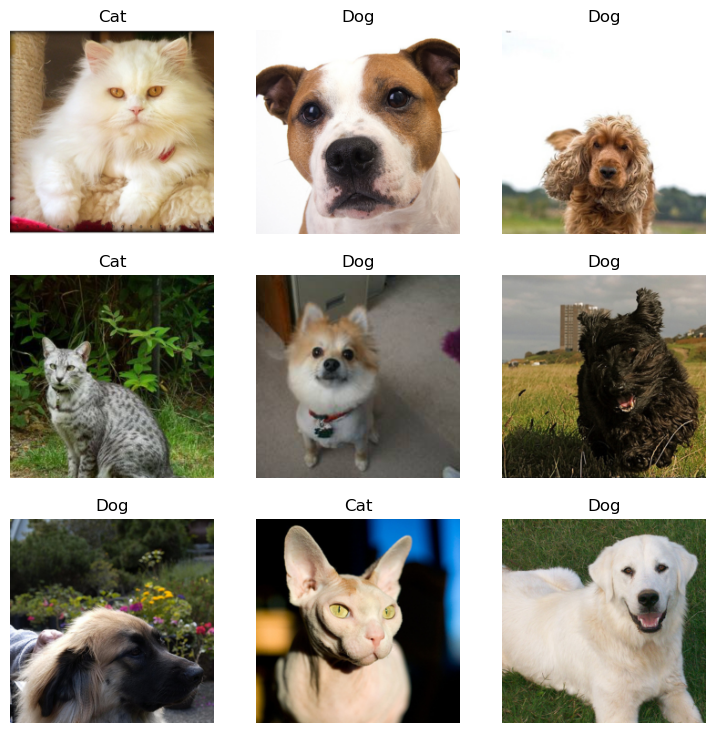

In [37]:
dls.show_batch()

In [39]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

C:\Users\deshp\miniconda3\envs\fastai\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\deshp\miniconda3\envs\fastai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.154112,0.034252,0.012179,01:34


epoch,train_loss,valid_loss,error_rate,time
0,0.052341,0.034055,0.008119,01:02


In [41]:
learn.predict(files[0])

('Cat', tensor(0), tensor([1.0000e+00, 1.5459e-06]))

In [43]:
learn.predict(files[6000])

('Dog', tensor(1), tensor([4.5359e-05, 9.9995e-01]))

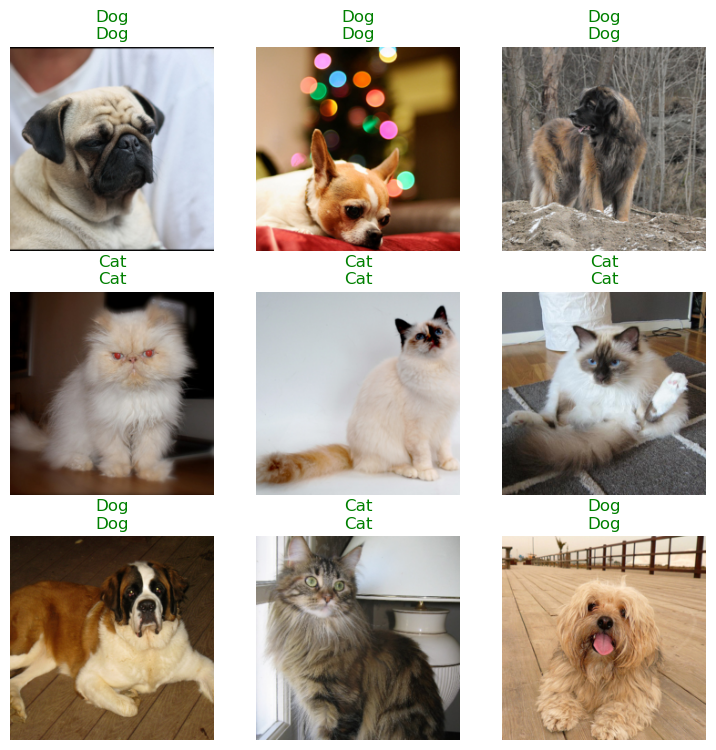

In [45]:
learn.show_results()

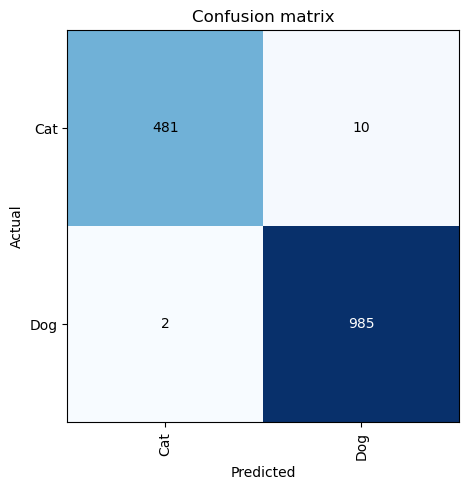

In [48]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

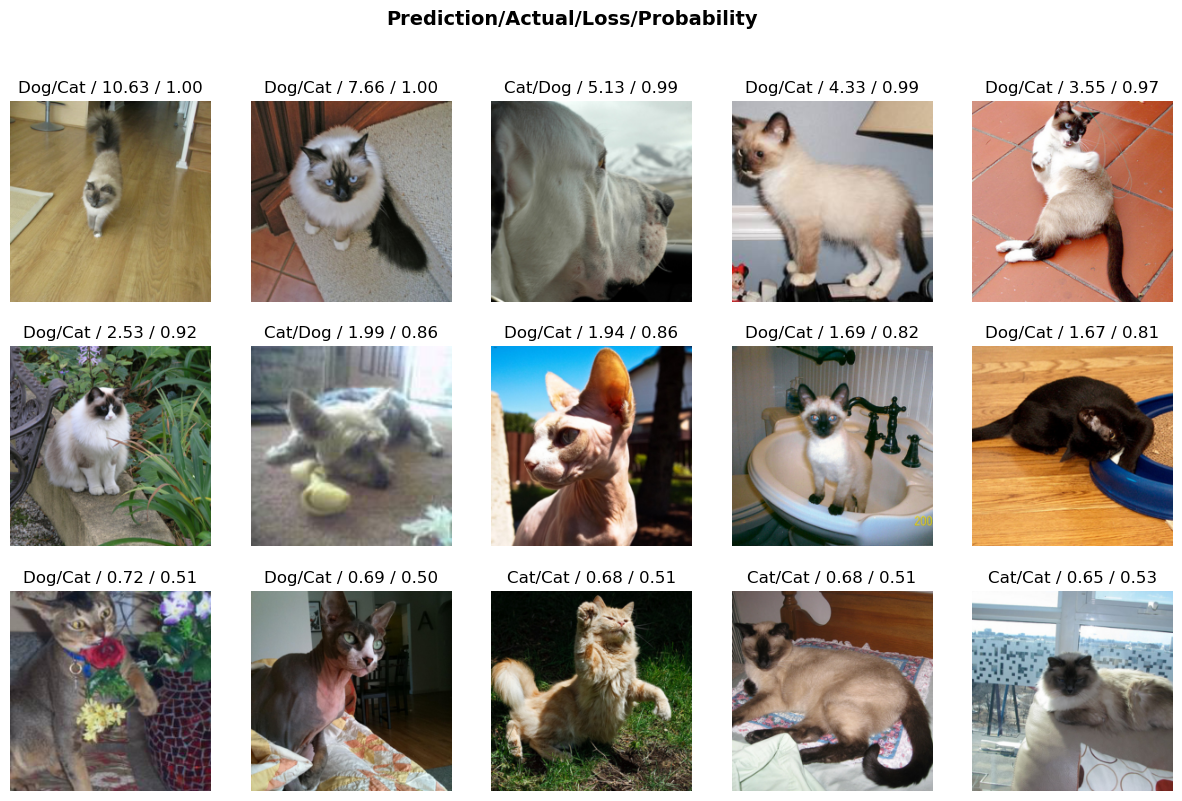

In [50]:
interp.plot_top_losses(k=15)

In [51]:
from fastai.vision.widgets import *

In [53]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

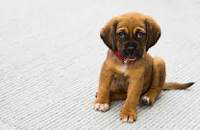

In [78]:
img = PILImage.create(btn_upload.data[-1])
img

In [79]:
output = widgets.Output()
output.clear_output()
with output: display(img.to_thumb(224,224))
output

Output()

In [101]:
learn.predict(img)

('Dog', tensor(1), tensor([6.2236e-08, 1.0000e+00]))

In [102]:
pred_label, pred_label_index, pred_probs = learn.predict(img)

In [103]:
label = widgets.Label()
label.value = f'Prediction: {pred_label}; Probability: {pred_probs[pred_label_index]:.04f}'
label

Label(value='Prediction: Dog; Probability: 1.0000')

In [104]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [105]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    output.clear_output()
    with output: display(img.to_thumb(128,128))
    pred_label, pred_label_index, pred_probs = learn.predict(img)
    label.value = f'Prediction: {pred_label}; Probability: {pred_probs[pred_label_index]:.04f}'

btn_run.on_click(on_click_classify)

In [127]:
VBox([widgets.Label('Select your bear!'), btn_upload, btn_run, output, label])